In [88]:

%matplotlib inline 
from IPython.display import clear_output
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import time
from scipy.stats import entropy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import os
# import scipy
# import seaborn as sns
# from matplotlib import pyplot as plt
# import matplotlib as mpl
# import math
# import gensim
# from itertools import repeat
# import gensim.downloader
# from sklearn.metrics.pairwise import cosine_similarity
# import statsmodels.api as sm
# # from gensim.models.fasttext import load_facebook_mode
import warnings
warnings.filterwarnings('ignore')


In [89]:
# ### openAI imports

# import openai

In [90]:
def make_ratings_mat(grouped_ratings_df):
    
    mat = np.zeros((len(np.unique(grouped_ratings_df.prompt)),71))
    for i,con in enumerate(np.unique(grouped_ratings_df.prompt)):
        ds = grouped_ratings_df[grouped_ratings_df.prompt==con]
        mat[i,:] = ds.iloc[:,3].values


    mat = pd.DataFrame(mat, index =np.unique(grouped_ratings_df.prompt), columns = np.arange(mat.shape[1]) )
    cmeans = mat.mean().values
    return mat, cmeans

In [91]:
set_1_raw = pd.read_csv('../../data/uw71_set1_redo_raw.csv')
set_2_raw = pd.read_csv('../../data/uw71_set2_raw.csv')
set_3_raw = pd.read_csv('../../data/uw71_set3_raw.csv')
set1_grouped = set_1_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set2_grouped = set_2_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set3_grouped = set_3_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()

ratings1,ratings_cmeans1= make_ratings_mat(set1_grouped)
ratings2,ratings_cmeans2= make_ratings_mat(set2_grouped)
ratings3,ratings_cmeans3= make_ratings_mat(set3_grouped)

concept_list = set1_grouped.pivot(index=['prompt','concept'], columns='color_index', values='mean_rating').reset_index().sort_values(by=['concept','prompt']).reset_index(drop=True)['prompt'].values
concept_list.sort()
concept_order  = {concept: i for i, concept in enumerate(concept_list)}

In [92]:
uw71coords = pd.read_csv('../../data/UW71coordinates_long.csv')

In [93]:
### vertically stack the ratings matrices
ratings_all = pd.concat([ratings1,ratings2,ratings3])


In [94]:
# ### Make a long string with all the entries in uw71coords.color_hex separated by commas
# all_color_string = ', '.join(uw71coords.color_hex.values)
# all_color_string

# with open('API_key_soil.txt') as f:
#     openai.api_key= f.readline()
#     f.close()


In [95]:
# no_skip_concepts = ['happy']
# reps=1

# assocs = np.zeros((70*reps,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept not in no_skip_concepts:
#     continue
#   for j in range(reps):

#     clear_output()
#     print(f'Evaluating: {this_concept}')

#     for k,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#       time.sleep(.3)
#       response = openai.ChatCompletion.create(
#         model="gpt-4",
#         messages=[{
#               "role": "system",
#               "content": "You are an expert on color-concept associations."
#             },

#             {
#               "role": "user",
#               "content": f"\
#               Let's do the rating task - \
#       Concept: '{this_concept}'\
#       Colors: {this_color}\
#       Answer with only the number:"
#             }],
#         temperature=1,
#         max_tokens=10
#       )
#       assocs[reps*i + j,k] = float(response.choices[0].message.content)
#     gpt_assoc_df = pd.DataFrame(assocs, index = np.repeat(ratings_all.index.values,reps), columns = np.arange(71))
#     gpt_assoc_df.to_csv('../../data/gpt4_ratings_happy.csv')
   




In [96]:

# assocs = np.zeros((70,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept in ([
#     'above',
# 'angry',
# 'beach',
# 'below',
# 'beside',
# 'blueberry',
# 'dawn',
# 'day',
# 'disgust',
# 'dress',
# 'dusk',
# 'far',
# 'fearful',
# 'field',
# 'happy',
# 'lemon',
# 'mango',
# 'near',
# 'night',
# 'noon',
# 'ocean',
# 'pants',
# 'sad',
# 'shirt',
# 'shoes',
# 'sky',
# 'socks',
# 'strawberry',
# 'sunset',
# 'watermelon',
# 'bear',
# 'bird',
# 'blizzard',
# 'boat',
# 'car',
# 'drought',
# 'evil',
# 'fish',
# 'frog',
# 'greed',
# 'hurricane',
# 'justice',
# 'lightning',
# 'lion',
# 'love',
# 'peace',
# 'plane',
# 'sandstorm']):
#     continue
#   clear_output()
#   print(f'Evaluating:{this_concept}')

#   for j,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#     time.sleep(3)
#     response = openai.ChatCompletion.create(
#       model="gpt-4",
#       messages=[{
#             "role": "system",
#             "content": "You are an expert on color-concept associations."
#           },

#           {
#             "role": "user",
#             "content": f"I will give you the hexcode for a color a concept. Rate on a continuous scale from 0 to 1, using 3 decimal places, how associated the color is with the concept.\
#             The concept is '{this_concept}'.\
#             Before rating, here's the set of all the colors {all_color_string}. Think of which color you associate most with '{this_concept}', that color should get a rating of 1. Now think of\
#             which color you associated least with '{this_concept}', that color should get a rating of 0. Okay, now let's do the rating task.\
#     Concept: '{this_concept}'\
#     Color: {this_color}\
#     Answer with only the number:"
#           }],
#       temperature=0,
#       max_tokens=10
#     )
#     assocs[i,j] = float(response.choices[0].message.content)
#   gpt_assoc_df = pd.DataFrame(assocs, index = ratings_all.index.values, columns = np.arange(71))
#   gpt_assoc_df.to_csv('../../data/recon_assocs/gpt4_ratings_anchored_4.csv')


In [97]:
gpt_assoc_anchor_df = pd.read_csv('../../data/gpt4_ratings_anchored_final.csv', index_col=0)
gpt_assoc_anchor_df = gpt_assoc_anchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_noanchor_df = pd.read_csv('../../data/gpt4_ratings.csv', index_col=0)
gpt_assoc_noanchor_df = gpt_assoc_noanchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple = pd.read_csv('../../data/gpt4_ratings_multiple_master.csv', index_col=0)
gpt_assoc_multiple = gpt_assoc_multiple.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple_grouped = gpt_assoc_multiple.groupby('concept').mean().reset_index()

Text(0.5, 1.0, 'GPT4 Color-Concept Associations No Anchor')

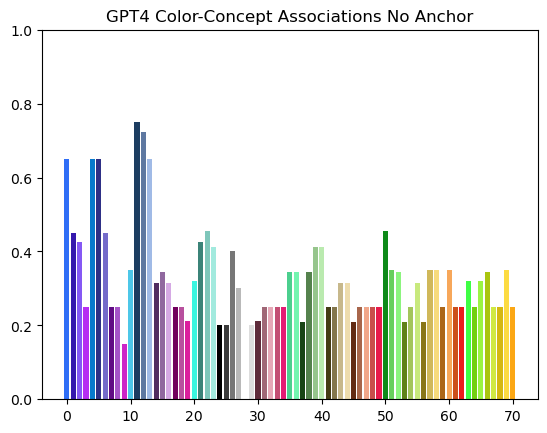

In [98]:
plt.bar(np.arange(71),gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations No Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Anchor')

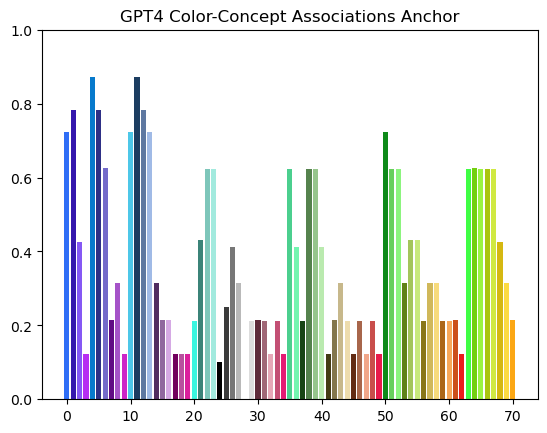

In [99]:
### anchoring
plt.bar(np.arange(71),gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Multiple')

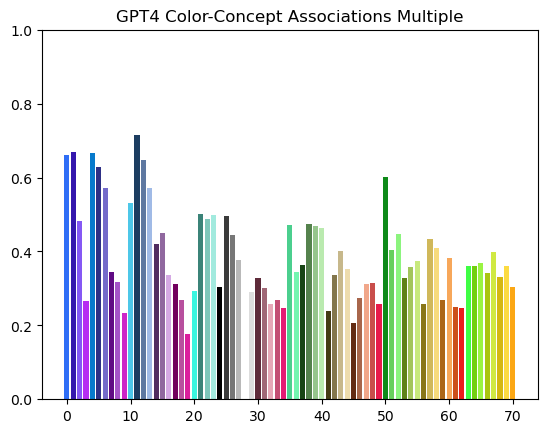

In [100]:
plt.bar(np.arange(71),gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Multiple')

Text(0.5, 1.0, 'Human Color-Concept Associations')

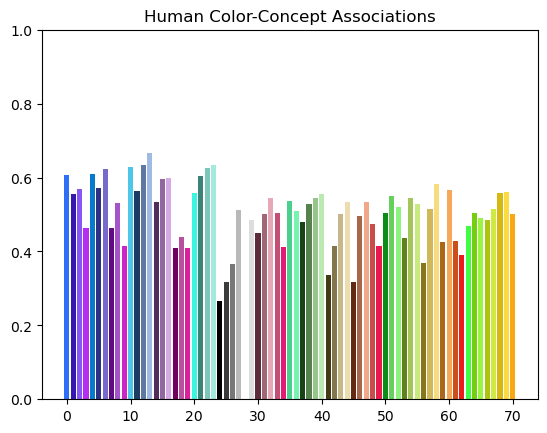

In [101]:
plt.bar(np.arange(71),ratings_all[ratings_all.index=='leisure'].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('Human Color-Concept Associations')

Text(0, 0.5, 'No Anchor')

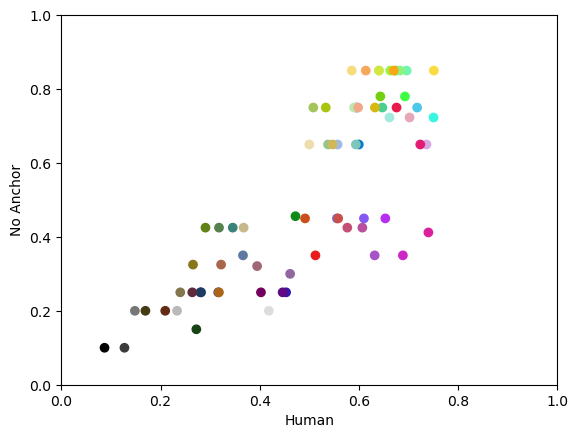

In [103]:

### group by concept in gpt_assoc_multiple and take the mean of the first 2 rows in each group
cons=[]
cors=[]
num_ratings = []
for i in range(10):
    grouped_df = gpt_assoc_multiple.groupby('concept').apply(lambda x: x.head(i+1).mean()).reset_index()
    for this_concept in grouped_df.concept:
        cons.append(this_concept)
        cors.append(pearsonr(grouped_df[grouped_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
        num_ratings.append(i+1)
multirate_plot_df = pd.DataFrame({'concept':cons,'r':cors,'num_ratings':num_ratings}) 



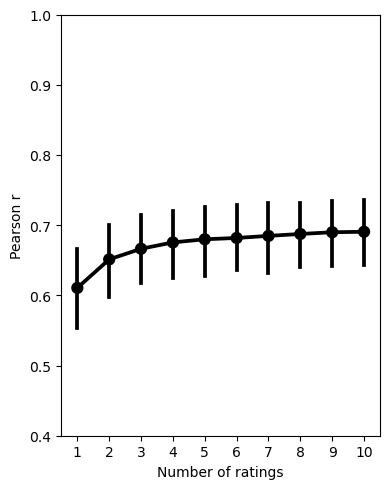

In [167]:
plt.figure(figsize=(4,5))
sns.pointplot(x='num_ratings',y='r',data=multirate_plot_df, color='black')
plt.ylim([.4,1])
plt.ylabel('Pearson r')
plt.xlabel('Number of ratings')
plt.tight_layout()
plt.savefig('../../plots/num_ratings_vs_cor.pdf',format ='pdf',bbox_inches='tight')

In [110]:
cons =[]
cors_noanchor = []
cors_anchor = []
cors_multiple = []
spec=[]
for this_concept in gpt_assoc_anchor_df.concept:
    cons.append(this_concept)
    cors_noanchor.append(pearsonr(gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_anchor.append(pearsonr(gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_multiple.append(pearsonr(gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])

    spec.append(1/entropy(ratings_all[ratings_all.index==this_concept].values[0]))
gpt_cor_df = pd.DataFrame({'concept':cons,'cor_noanchor':cors_noanchor,'cor_anchor': cors_anchor,'cor_multiple':cors_multiple,'specificity':spec})


mean correlation: 0.6662547658756296


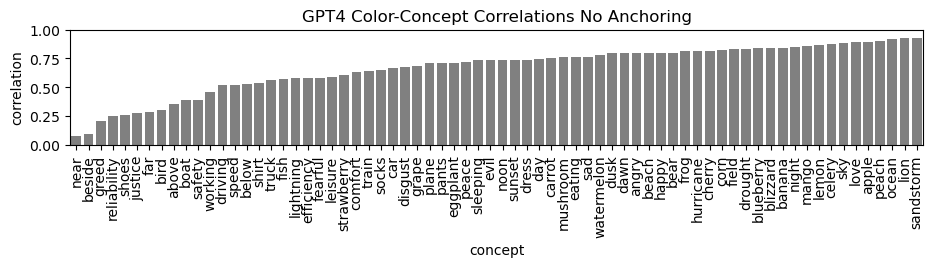

In [168]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_noanchor', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_noanchor.values, color='grey')
sns.barplot(x='concept',y='cor_noanchor',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations No Anchoring')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_noanchor.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_no_anchor_cors.pdf',format ='pdf',bbox_inches='tight')
# plt.savefig()

mean correlation: 0.6583742648465543


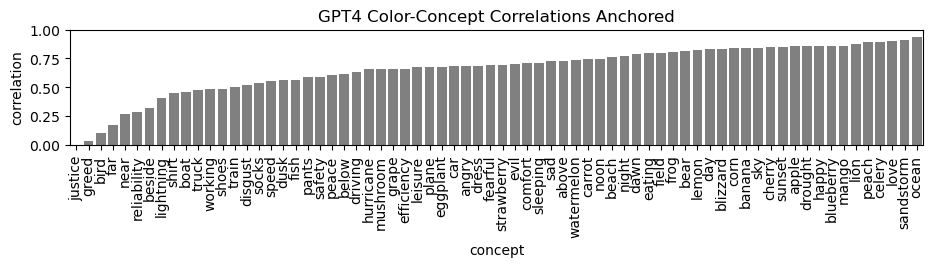

In [169]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_anchor', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_anchor.values, color='grey')
sns.barplot(x='concept',y='cor_anchor',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Anchored')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_anchor.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_anchored_cors.pdf',format ='pdf',bbox_inches='tight')

mean correlation: 0.6905070060900125


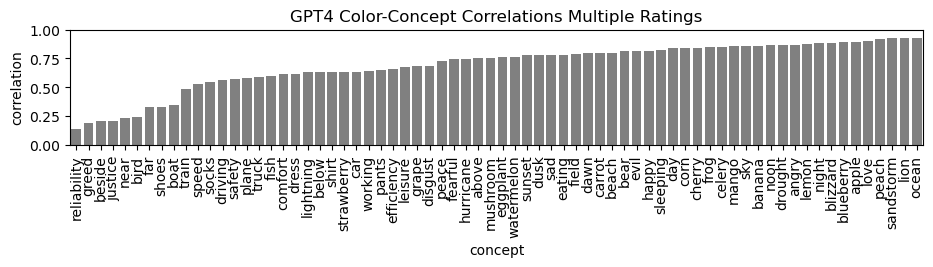

In [170]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(11,1.5))
gpt_cor_df.sort_values(by='cor_multiple', inplace=True)
# plt.bar(np.arange(70),gpt_cor_df.cor_multiple.values, color='grey')
sns.barplot(x='concept',y='cor_multiple',data=gpt_cor_df,color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Multiple Ratings')
plt.ylabel('correlation')
print('mean correlation:',gpt_cor_df.cor_multiple.mean())
plt.tight_layout()
plt.savefig('../../plots/gpt_multiple_rate_cors.pdf',format ='pdf',bbox_inches='tight')

In [36]:
### pivot gpt_cor_df into long format where the column names cor_noanchor, cor_anchor, and cor_multiple are values in a column called 'cor_type' and the values in each go into a column called 'cor'
gpt_cor_df_long = pd.melt(gpt_cor_df, id_vars=['concept','specificity'], value_vars=['cor_noanchor','cor_anchor','cor_multiple'], var_name='cor_type', value_name='cor')

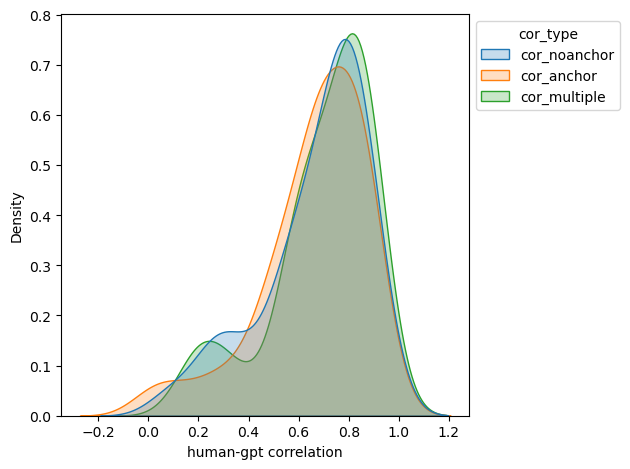

In [171]:
sns.kdeplot(x='cor', hue='cor_type',data=gpt_cor_df_long, fill=True)
# plt.xlim(0,1)
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('human-gpt correlation')
### move the seaborn legend in the top left
plt.tight_layout()
plt.savefig('../../plots/density.pdf',format ='pdf',bbox_inches='tight')
plt.show()

<AxesSubplot: xlabel='concept', ylabel='cor'>

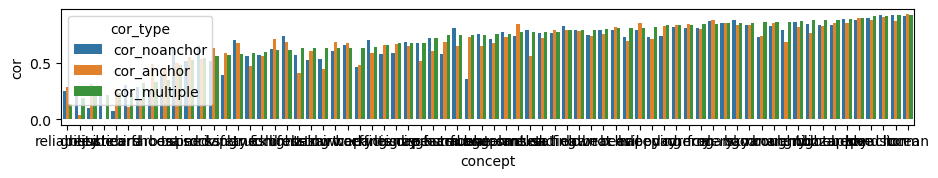

In [125]:

plt.figure(figsize=(11,1.5))
sns.barplot(x='concept',y='cor',hue='cor_type',data=gpt_cor_df_long)

In [43]:
all_raw = pd.concat([set_1_raw,set_2_raw,set_3_raw])
corrected_shs = []
con=[]
for i in range(50):
    for this_concept in ratings_all.index:
        this_concept_ratings = all_raw[all_raw.prompt==this_concept]
        sub_1 = np.random.choice(this_concept_ratings.subject_id.unique(), int(this_concept_ratings.subject_id.nunique()/2), replace=False)
        sub_2 = np.setdiff1d(this_concept_ratings.subject_id, sub_1)
        g1_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_1)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g2_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_2)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g1_ratings = make_ratings_mat(g1_grouped)[0]
        g2_ratings = make_ratings_mat(g2_grouped)[0]
        con.append(this_concept)
        corrected_shs.append(2*pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]/(1+pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]))



In [127]:
sh_df = pd.DataFrame({'concept':con,'sh':corrected_shs})
mean_sh_df = sh_df.groupby('concept').sh.agg(mean_sh='mean').reset_index()
mean_sh_df=mean_sh_df.sort_values(by='mean_sh', ascending=True)
gpt_cor_df = gpt_cor_df.merge(mean_sh_df, on='concept')
concept_order = {concept: i for i, concept in enumerate(mean_sh_df.sort_values(by='mean_sh', ascending=True).concept.values)}

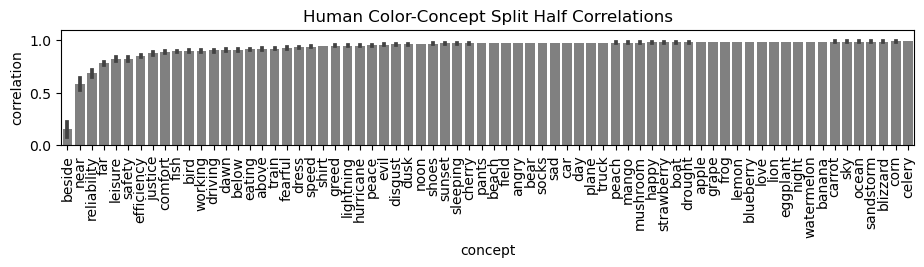

In [172]:

plt.figure(figsize=(11,1.5))
### sort sh_df by concept and do it in the order of the concept_order dictionary
sh_df['order'] = sh_df.concept.map(concept_order)
sh_df.sort_values(by='order', inplace=True)



sns.barplot(x='concept', y='sh',data=sh_df, color='grey')
plt.ylim(0,1.1)
### rotate the xticks by 90 degrees
plt.xticks(rotation=90)
plt.ylabel('correlation')
plt.title('Human Color-Concept Split Half Correlations')
plt.tight_layout()
plt.savefig('../../plots/human_split_half.pdf',format ='pdf',bbox_inches='tight')

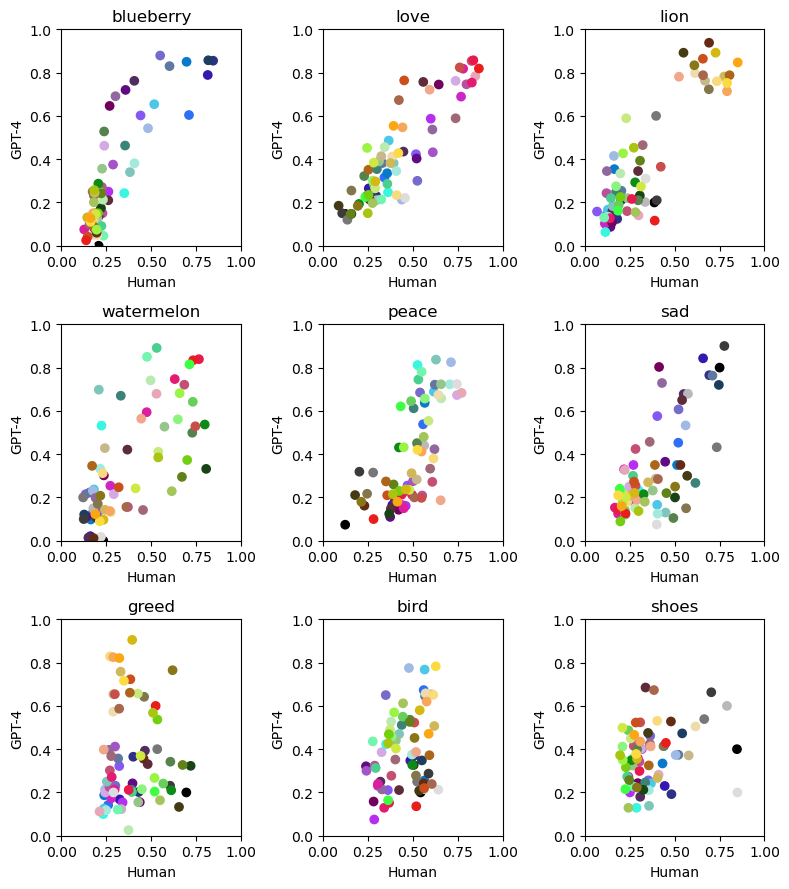

In [174]:
scatter_dict ={'high':['blueberry','love','lion'],'medium':['watermelon','peace','sad'],'low':['greed','bird','shoes']}

p_count=1
fig = plt.figure(1,figsize=(8,9))
for this_cat in scatter_dict.keys():
    for this_concept in scatter_dict[this_cat]:
        ax = fig.add_subplot(3,3,p_count)
        plt.scatter(ratings_all[ratings_all.index==this_concept].values[0],gpt_assoc_multiple[gpt_assoc_multiple.concept==this_concept].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
        plt.ylim([0,1])
        plt.xlim([0,1])
        plt.xlabel('Human')
        plt.ylabel('GPT-4')
        plt.title(this_concept)
        plt.tight_layout()
        p_count+=1

plt.savefig('../../plots/high_med_low.pdf',format ='pdf',bbox_inches='tight')
plt.show()

,concept,0,1,2,3,4,5,6,7,8,...,61,62,63,64,65,66,67,68,69,70
0,above,0.427,0.650,0.405,0.145,0.441,0.577,0.448,0.337,0.367,...,0.231,0.297,0.483,0.413,0.316,0.123,0.210,0.307,0.215,0.472
1,above,0.244,0.482,0.166,0.265,0.639,0.457,0.365,0.251,0.223,...,0.211,0.082,0.536,0.383,0.432,0.319,0.128,0.247,0.351,0.378
2,above,0.352,0.235,0.454,0.192,0.783,0.345,0.489,0.234,0.342,...,0.190,0.188,0.260,0.351,0.315,0.347,0.578,0.419,0.537,0.492
3,above,0.675,0.239,0.782,0.167,0.642,0.420,0.385,0.281,0.082,...,0.271,0.167,0.392,0.405,0.487,0.442,0.401,0.290,0.096,0.109
4,above,0.234,0.281,0.438,0.351,0.386,0.258,0.356,0.027,0.418,...,0.408,0.053,0.210,0.209,0.287,0.413,0.421,0.362,0.498,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,working,0.612,0.373,0.425,0.339,0.745,0.613,0.620,0.150,0.352,...,0.592,0.328,0.358,0.570,0.684,0.721,0.382,0.646,0.589,0.733
696,working,0.500,0.298,0.227,0.249,0.647,0.571,0.406,0.180,0.394,...,0.675,0.300,0.607,0.587,0.739,0.577,0.620,0.573,0.646,0.399
697,working,0.318,0.387,0.323,0.232,0.674,0.568,0.273,0.200,0.401,...,0.476,0.378,0.660,0.670,0.628,0.623,0.591,0.664,0.600,0.620
698,working,0.650,0.350,0.235,0.324,0.697,0.629,0.468,0.357,0.325,...,0.470,0.133,0.320,0.776,0.647,0.633,0.552,0.550,0.651,0.689


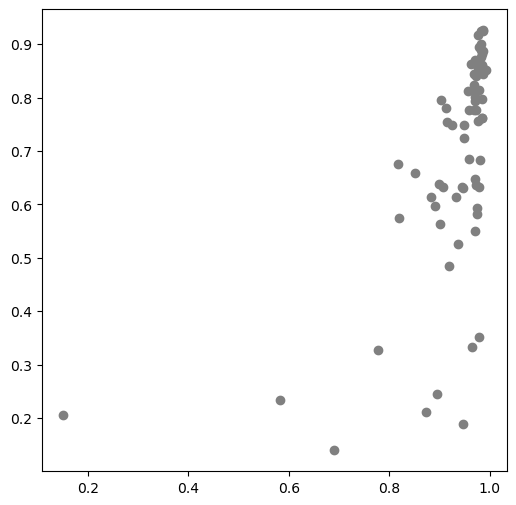

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(gpt_cor_df.mean_sh.values,gpt_cor_df.cor_multiple.values, color='grey')

Text(0.5, 0, 'log Human split half correlation')

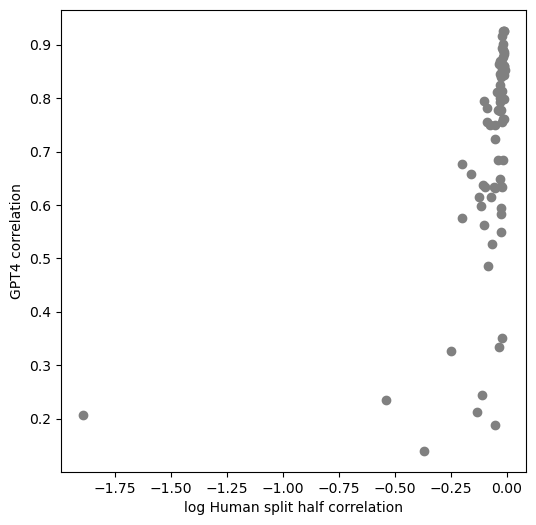

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(np.log(gpt_cor_df.mean_sh.values),(gpt_cor_df.cor_multiple.values), color='grey')
plt.ylabel('GPT4 correlation')
plt.xlabel('log Human split half correlation')

Text(0.5, 0, 'log Human split half correlation')

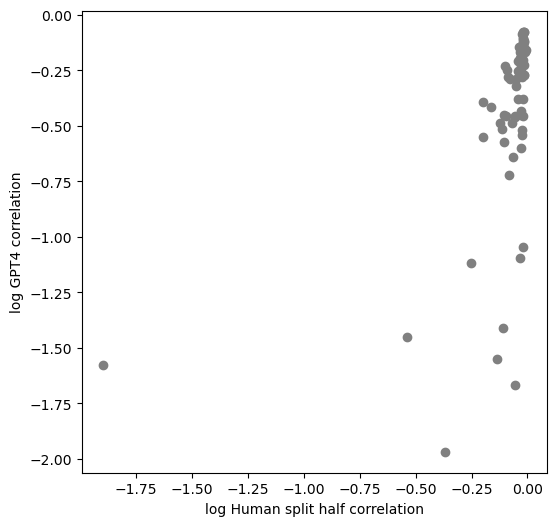

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(np.log(gpt_cor_df.mean_sh.values),np.log(gpt_cor_df.cor_multiple.values), color='grey')
plt.ylabel('log GPT4 correlation')
plt.xlabel('log Human split half correlation')

In [ ]:
pearsonr(mean_sh_df.sort_values(by='concept').mean_sh.values, gpt_cor_df.sort_values(by='concept').cor.values)

In [ ]:
gpt_cor_df.sort_values(by='concept',inplace=True)
mean_sh_df.sort_values(by='concept',inplace=True)
gpt_cor_df['cor'] = gpt_cor_df.cor/mean_sh_df.mean_sh

In [ ]:
plt.figure(figsize=(10,5))
gpt_cor_df.sort_values(by='cor', inplace=True)
plt.bar(np.arange(70),gpt_cor_df.cor.values, color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations')

In [63]:
### import the scipy module for paired t-tests
from scipy.stats import ttest_rel


### exp 1 split half vs. gpt zero temp
ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_noanchor.values)

Ttest_relResult(statistic=13.834174046941488, pvalue=1.4034485983094645e-21)

In [64]:
### exp 2 split half vs. gpt zero temp anchoring
print(ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_anchor.values))
### exp 2 gpt zero temp vs. gpt zero temp anchoring
print(ttest_rel(gpt_cor_df.cor_noanchor.values, gpt_cor_df.cor_anchor.values))

Ttest_relResult(statistic=12.192328657653572, pvalue=7.052827409686265e-19)
Ttest_relResult(statistic=0.6022930340802884, pvalue=0.5489533271790907)


In [66]:
## exp 3 split half vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.mean_sh.values, gpt_cor_df.cor_multiple.values))

## exp 3 no anchoring vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.cor_multiple.values,gpt_cor_df.cor_noanchor.values))

## exp 3 anchoring vs. gpt multiple ratings
print(ttest_rel(gpt_cor_df.cor_multiple.values,gpt_cor_df.cor_anchor.values))

Ttest_relResult(statistic=12.137128544614434, pvalue=8.74384001936489e-19)
Ttest_relResult(statistic=2.4930575406236475, pvalue=0.015068004417375916)
Ttest_relResult(statistic=3.13408934221356, pvalue=0.0025313482713352404)
